## Problema

### Luan todos os dias pede R$ 2,00 para seu pai. No dia 30.000, quantos reais seu pai terá desembolsado?

### Quais os dados disponíveis?
- criando dados para simular o que temos
- do dia 0 até o dia 20.000 (perceba que não queremos até o dia 30.000)
- colocamos também o valor "sacado" do pai

In [1]:
dataset_dict = {"dia":[],"saque":[]}

for i in range(20000):
    #inserindo numero de dias
    dataset_dict['dia'].append(i)
    #inserindo numero de dias
    dataset_dict['saque'].append(i*2)

In [10]:
# visualizando os dados gerados
segundo_dia = dataset_dict['dia'][2]
segundo_saque = dataset_dict['saque'][2]
print(f'no dia {segundo_dia} foi sacado do pai {segundo_saque} reais')

no dia 2 foi sacado do pai 4 reais


In [32]:
# Caso queira ver tudo o que foi gerado, descomente abaixo
#dataset_dict

In [11]:
# transformando em um dataset
import pandas as pd

# pegando nosso dado dataset_dict e transformando em um DataFrame
#O Dataframe facilita o input para os algorítimos
dataset_raw = pd.DataFrame(data = dataset_dict)

In [12]:
dataset_raw.head()

,dia,saque
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


## O que Quero Prever?
- y -> Target , variável dependente -> Saque
- Ela que eu desejo prever no meu 30000 dia

In [33]:
## Variável que quero prever
y = dataset_raw['saque']

## Quais variáveis alteram minha previsão? 
- x -> Variável independente
- conforme muda os dias, o valor muda

In [ ]:
x = dataset_raw['dia']

## Qual algorítimo pode me ajudar a explicar essa relação?
- Como estão meus dados em relação a organização?
- Representando em um gráfico

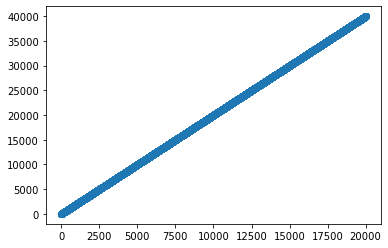

In [34]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.show()

## Escolhendo um modelo e utilizando
- entendi que uma possível explicação é uma regressão linear(reta)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
modelo_teste = LinearRegression()

In [37]:
# Dividindo em treino e teste(não será utilizado agora)
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30)

In [43]:
# adaptando os dados conforme o algoritmo espera
x_treino_adaptado = x_treino.values.reshape(x_treino.shape[0],1)

# fazendo o treinamento do algoritmo
modelo_teste.fit(x_treino_adaptado, y_treino)

LinearRegression()

## Testando

In [44]:
import numpy as np

In [56]:
dia_teste = 900000
dia_teste_adaptado = np.array([dia_teste])

In [57]:
# testando
modelo_teste.predict([dia_teste_adaptado])[0]

1800000.0000000016

## Validando a % de acerto

In [59]:
modelo_teste.score(x_teste.values.reshape(x_teste.shape[0],1),y_teste)

1.0

## Transformando em um binário para ser consumido posteriormente
- com a criação do modelo, ele está na memória do PC
- para que isso seja "exportável" para outras aplicações, transformamos o modelo em um arquivo "binário"

In [60]:
import pickle

In [61]:
pickle.dump(modelo_teste, open('modelo_teste.sav','wb'))

In [62]:
modelo_carregado = pickle.load(open('modelo_teste.sav','rb'))

## Utilizando o modelo binário

In [64]:
modelo_carregado.predict([dia_teste_adaptado])

array([1800000.])